# Neural Networks

### Welcome to the 4th Lab of 42028: Deep Learning and CNN!

In this  Lab/Tutorial session you will be implementing Neural Network for Fashion MNIST dataset classification .

So lets get started!

## Tasks for this week:

1. Implementation of Neural Network for classification using Keras API. 
2. Train and test model


### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [0]:
import tensorflow as tf
import os
import numpy as np

%load_ext tensorboard

In [2]:
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0-rc2
2.3.0-tf


### Step 2: Download the Fashion Mnist dataset using keras

In [0]:
fashionMnist=tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashionMnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

3


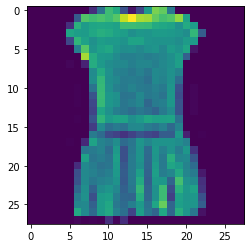

In [7]:
## Show an image from theh dataset
import matplotlib.pyplot as plt
plt.imshow(train_images[3])
print(train_labels[3])

** Note :** Scikit-learn import the Fashion MNIST dataset as a 1-D array while Keras API load the dataset in 28X28 format.

### Step 3: Normalize the dataset and split the small part of the training set into validation set


- Validation set: first 5000 samples 
- Training set: 5000 to remaining

In [0]:
## WRITE YOUR CODE HERE ## (~ 5 line of code)
## Hint: Using slicing to split the training to train and validation

valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]


train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images / 255.0

### END YOUR CODE HERE ###

In [9]:
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


[**Expected** Output]

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)

### Step 4:  Design the model

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## **Notes:**
* **Sequential model.** This is the simplest kind of Keras model, for neural networks which defines a SEQUENCE of layers.

* **Flatten.** Flatten just takes that image and turns it into a 1-dimensional vector.

* Next we add a second Dense hidden layer with 128 neurons, also using the ReLU activation function.  **Dense.** Add a layer to the neural network which is followed by activation function of ReLU. The ReLU only passes the value greater than 0 and for all other values of X it passes 0.
e.g. If X>0 return X, else return 0"

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function.

* ** Softmax** The softmax takes a set of values and select the biggest one from the set of values.

### Step 5: Training the model

**"sparse_categorical_crossentropy": **   The dataset contains sparse labels and the classes are exclusive.

** One-hot vector encoding** This is sometime used for encoding the labels if there one target  probability per class for each instance. For example.
[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.] represent one-hot encoding for class 4. In such case, **"categorical_crossentropy"** loss is used.

** "sigmoid_crossentropy"** This loss is used for binary class classification problems and also **"sigmoid"** activation function is used instead of Softmax.



In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5079 - accuracy: 0.8233 - val_loss: 0.3988 - val_accuracy: 0.8612
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8639 - val_loss: 0.3480 - val_accuracy: 0.8730
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3398 - accuracy: 0.8773 - val_loss: 0.3361 - val_accuracy: 0.8726
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3157 - accuracy: 0.8837 - val_loss: 0.3237 - val_accuracy: 0.8824
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8898 - val_loss: 0.3177 - val_accuracy: 0.8790
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8965 - val_loss: 0.3106 - val_accuracy: 0.8866
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9005 - val_loss: 0.3068 - val_accuracy:

Why do we use validation dataset?

In [12]:
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Task:

Change the Optimizer to SGD or any other optimizer and retrain the model.

Reference: 

https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer


https://www.tensorflow.org/api_docs/python/tf/train/Optimizer 

In [13]:
## WRITE YOUR CODE HERE ## (~ 2 line of code)

model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

### END YOUR CODE HERE ###

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7635 - accuracy: 0.7545 - val_loss: 0.5508 - val_accuracy: 0.8180
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5218 - accuracy: 0.8242 - val_loss: 0.4818 - val_accuracy: 0.8404
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4755 - accuracy: 0.8363 - val_loss: 0.4489 - val_accuracy: 0.8462
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4494 - accuracy: 0.8447 - val_loss: 0.4433 - val_accuracy: 0.8420
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4301 - accuracy: 0.8512 - val_loss: 0.4260 - val_accuracy: 0.8576
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4160 - accuracy: 0.8559 - val_loss: 0.4004 - val_accuracy: 0.8670
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8605 - val_loss: 0.4104 - val_accuracy:

### Summary of the model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


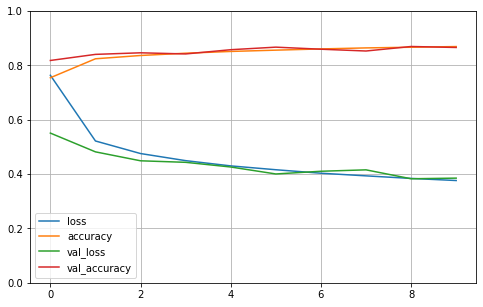

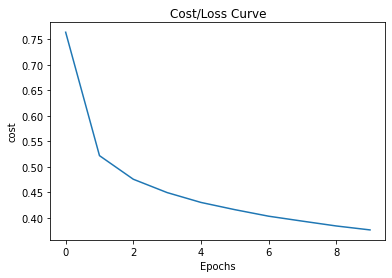

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

### Step 6: Evaluation on test dataset

In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8847


[0.3297950029373169, 0.8847000002861023]

## Task

Evaluate the model trained with SGD


In [17]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4195 - accuracy: 0.8523


[0.4195259213447571, 0.8522999882698059]

### Callbacks for early stopping training

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.1):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [19]:
callbacks = myCallback()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[28,28]),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4829
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3639
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3263
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3029
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2839
